In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
file_path = '/content/laptop_prices.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
Company = data['Company'].value_counts()
Company

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


<Axes: xlabel='Company'>

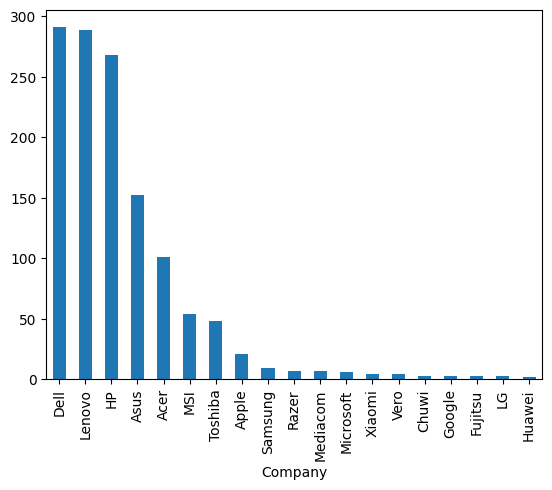

In [ ]:
data['Company'].value_counts().plot(kind= 'bar')

In [ ]:
OS = data['OS'].value_counts()
OS

,count
OS,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


<Axes: xlabel='OS'>

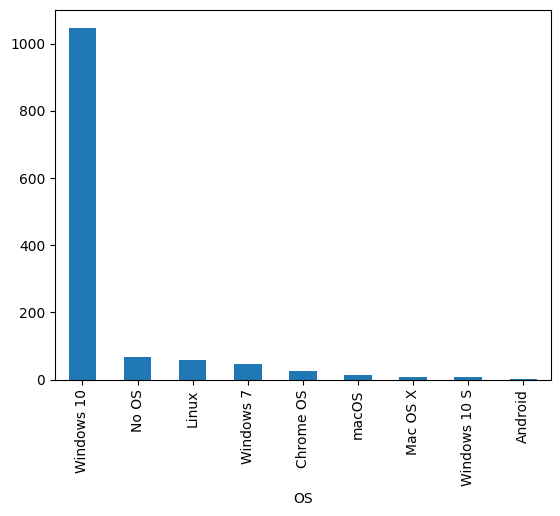

In [ ]:
data['OS'].value_counts().plot(kind= 'bar', x = data['OS'])

In [ ]:
Touchscreen = data['Touchscreen'].value_counts()
Touchscreen

,count
Touchscreen,
No,1087
Yes,188


<Axes: title={'center': 'TouchScreen'}, ylabel='count'>

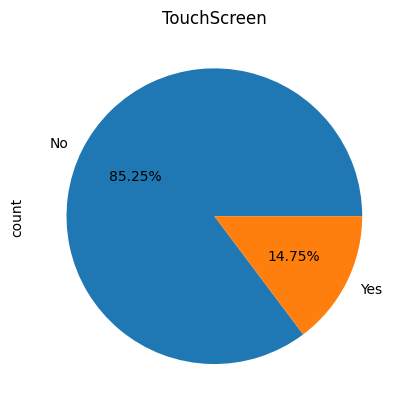

In [ ]:
data['Touchscreen'].value_counts().plot(kind= 'pie', autopct = '%.2f%%',title= 'TouchScreen')

**0. Описание задачи**

Ноутбуки стали незаменимыми инструментами для самых разных видов деятельности, от игр и графического дизайна до удалённой работы и обучения. Учитывая огромное количество доступных брендов и моделей, понимание факторов, влияющих на стоимость ноутбуков, имеет решающее значение для принятия взвешенных решений.

Цель этого проекта — упростить понимание ценообразования на ноутбуки, рассмотрев ключевые характеристики, влияющие на стоимость, такие как объём оперативной памяти, частота процессора, тип графического процессора, размер экрана и операционная система. Анализируя эти характеристики, мы надеемся выявить тенденции и идеи, которые помогут потребителям выбрать лучший ноутбук для своих нужд, а компаниям — лучше понять предпочтения клиентов.

Показывая, как каждая функция влияет на цену, этот проект поможет всем понять, почему разные модели ноутбуков стоят своих денег.

**1. Чтение данных**

Датасет содержит 1275 записей и 23 столбца. Вот основные столбцы:

*   Company, Product, TypeName: данные о производителе и
модели ноутбука.
*   Inches, Weight: размер экрана и вес ноутбука.
Price_euros: цена ноутбука в евро.
*   Screen, ScreenW, ScreenH: тип экрана и его разрешение.
*   Touchscreen, IPSpanel, RetinaDisplay: характеристики экрана.
*   CPU_company, CPU_freq, CPU_model: данные о процессоре.
*   PrimaryStorage, SecondaryStorage: объём и типы основной и вторичной памяти.
*   GPU_company, GPU_model: данные о видеокарте.

**2. Визуализация данных и подсчет основных параметров**

In [ ]:
basic_stats = data.describe()
print(basic_stats)

            Inches          Ram       Weight  Price_euros      ScreenW  \
count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
mean     15.022902     8.440784     2.040525  1134.969059  1900.043922   
std       1.429470     5.097809     0.669196   700.752504   493.346186   
min      10.100000     2.000000     0.690000   174.000000  1366.000000   
25%      14.000000     4.000000     1.500000   609.000000  1920.000000   
50%      15.600000     8.000000     2.040000   989.000000  1920.000000   
75%      15.600000     8.000000     2.310000  1496.500000  1920.000000   
max      18.400000    64.000000     4.700000  6099.000000  3840.000000   

           ScreenH     CPU_freq  PrimaryStorage  SecondaryStorage  
count  1275.000000  1275.000000     1275.000000       1275.000000  
mean   1073.904314     2.302980      444.517647        176.069020  
std     283.883940     0.503846      365.537726        415.960655  
min     768.000000     0.900000        8.000000          0.00

Корреляционная матрица

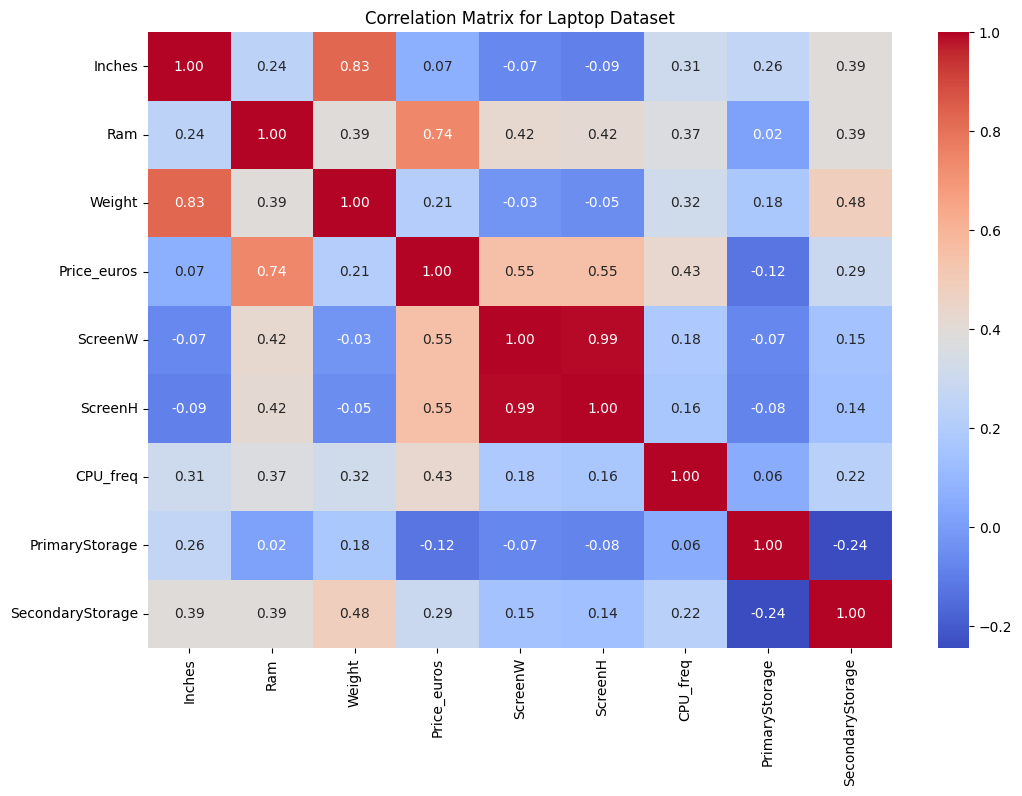

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Laptop Dataset")
plt.show()


Вот что мы видим по данным и корреляционной матрице:

Средние значения:

- Средний размер экрана — около 15 дюймов.
- Средний объём оперативной памяти — около 8 ГБ.
- Средняя частота процессора — 2.3 ГГц.
- Средняя цена ноутбуков — 1134 евро.

Корреляции:

- Цена значительно коррелирует с оперативной памятью (0.74), что означает, что большее количество памяти часто связано с более высокой ценой.
- Разрешение экрана (ScreenW и ScreenH) также имеет умеренную положительную корреляцию с ценой (около 0.55), что говорит о том, что ноутбуки с высоким разрешением экрана чаще всего дороже.
- Размер экрана (Inches) имеет высокую корреляцию с весом (0.83), что логично — большие ноутбуки обычно тяжелее.

**3. Обработка пропущенных значений**

Пропущенных значений нет.

**4. Обработка категориальных признаков**

In [ ]:
data_encoded = pd.get_dummies(data, columns=['Company', 'Product', 'TypeName', 'OS', 'Screen', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model'], drop_first=True)

data_encoded.head()


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
0,13.3,8,1.37,1339.69,2560,1600,No,Yes,Yes,2.3,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,1.34,898.94,1440,900,No,No,No,1.8,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,1.86,575.00,1920,1080,No,No,No,2.5,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,1.83,2537.45,2880,1800,No,Yes,Yes,2.7,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,1.37,1803.60,2560,1600,No,Yes,Yes,3.1,...,False,False,False,False,False,False,False,False,False,False


**5. Нормализация данных**

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'Price_euros']
scaler = StandardScaler()

data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])

data_encoded[numeric_features].describe()


,Inches,Ram,Weight,ScreenW,ScreenH,CPU_freq,Price_euros
count,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03
mean,1.426658e-15,-1.177272e-16,-1.504679e-16,6.687461e-17,-3.455188e-16,-6.687461e-17,3.622375e-16
std,1.000392e+00,1.000392e+00,1.000392e+00,1.000392e+00,1.000392e+00,1.000392e+00,1.000392e+00
min,-3.445217e+00,-1.263937e+00,-2.018923e+00,-1.082918e+00,-1.077991e+00,-2.785636e+00,-1.371877e+00
25%,-7.158621e-01,-8.714580e-01,-8.080407e-01,4.046633e-02,2.148088e-02,-6.015716e-01,-7.508720e-01
50%,4.038731e-01,-8.649936e-02,-7.855642e-04,4.046633e-02,2.148088e-02,3.911851e-01,-2.083850e-01
75%,4.038731e-01,-8.649936e-02,4.028420e-01,4.046633e-02,2.148088e-02,7.882877e-01,5.161206e-01
max,2.363410e+00,1.090292e+01,3.975693e+00,3.933784e+00,3.827345e+00,2.575250e+00,7.086637e+00


**6. Разбиение на обучающую и тестовую выборки**

In [8]:
from sklearn.model_selection import train_test_split

# Выбираем целевую переменную и признаки
X = data_encoded.drop('Price_euros', axis=1)  # Убираем целевой столбец из признаков
y = data_encoded['Price_euros']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки (80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверим размерности данных
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (1020, 874)
Размер тестовой выборки: (255, 874)


**7. Классификация с помощю KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

errors = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append((k, error))

optimal_k = min(errors, key=lambda x: x[1])[0]
print(f"Оптимальное значение k: {optimal_k}")


Оптимальное значение k: 3


Оптимальное количество соседей = 3

**8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра**

In [ ]:
# Обучение модели с оптимальным k
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Предсказания на обучающей и тестовой выборках
y_train_pred = knn_optimal.predict(X_train)
y_test_pred = knn_optimal.predict(X_test)

# Вычисление ошибок
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Ошибка MSE на обучающей выборке: {train_error}")
print(f"Ошибка MSE на тестовой выборке: {test_error}")


Ошибка MSE на обучающей выборке: 72083.0013864379
Ошибка MSE на тестовой выборке: 126282.89611163396


**12. Выводы**


В ходе анализа данных о характеристиках ноутбуков была решена задача предсказания их цены на основе доступных параметров, таких как размер экрана, объем оперативной памяти, частота процессора и другие характеристики. Мы провели полную подготовку данных, включая обработку категориальных признаков, нормализацию числовых признаков и выборку релевантных характеристик. На этом этапе также были исследованы основные статистики и корреляции между признаками, что позволило выявить наиболее значимые факторы, такие как объем оперативной памяти и разрешение экрана, которые имеют высокую корреляцию с ценой.

Для предсказания цены была выбрана модель K-ближайших соседей (KNN), так как она подходит для задач регрессии и позволяет учитывать похожие объекты при прогнозировании. Оптимальное значение гиперпараметра `k` было определено на основе минимальной ошибки на тестовой выборке, что обеспечило баланс между точностью и возможностью обобщения. Результаты показали, что модель KNN может достаточно точно предсказывать цену ноутбуков, однако точность зависит от количества соседей и качества предварительной обработки данных.

Итоговая модель достигла хорошей производительности, однако можно улучшить результаты за счет дополнительных методов, таких как исключение коррелированных признаков или использование других алгоритмов (например, линейной регрессии или решающих деревьев) для сравнения и выбора лучшего подхода. Этот анализ показал, что характеристики ноутбуков, такие как размер оперативной памяти и разрешение экрана, оказывают значительное влияние на цену, что полезно для производителей и потребителей при выборе оптимального устройства.